<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Normal Distribution MLE Estimators:


##Exponential Distribution MLE Estimators:
λ^=∑Tt=1xtT

In [0]:
# Useful Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats

#1: Normal Distribution

    Given the equations above, write down functions to calculate the MLE estimators μ^

and σ^
of the normal distribution.
Given the sample normally distributed set, find the maximum likelihood μ^
and σ^
.
Fit the data to a normal distribution using SciPy. Compare SciPy's calculated parameters with your calculated values of μ^
and σ^
.
Plot a normal distribution PDF with your estimated parameters

In [0]:
# Normal mean and standard deviation MLE estimators
def normal_mu(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [4]:
# Normal Distribution Sample Data
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 10000000)

# Use your functions to compute the MLE mu and sigma
mu = normal_mu(X)
std = normal_sigma(X)

print ('Maximum likelihood value of mu:', mu)
print ('Maximum likelihood value for sigma:', std)

Maximum likelihood value of mu: 40.00628052260704
Maximum likelihood value for sigma: 9.999450198075902


In [5]:
# Fit the distribution using SciPy and compare those parameters with yours 
scipy_mu, scipy_std = scipy.stats.norm.fit(X)
print ('Scipy Maximum likelihood value of mu:', scipy_mu)
print ('Scipy Maximum likelihood value for sigma:', scipy_std)

Scipy Maximum likelihood value of mu: 40.006280522610176
Scipy Maximum likelihood value for sigma: 9.999450198076236


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


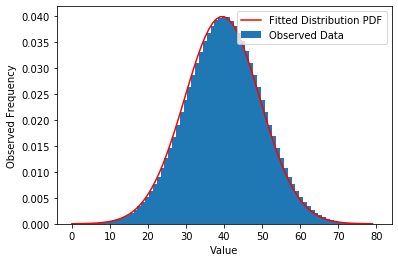

In [6]:
# Get the PDF, fill it with your calculated parameters, and plot it along x
x = np.linspace(0, 80, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(scipy.stats.norm.pdf(x, loc=mu, scale=std), color='red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

2: Exponential Distribution

    Given the equations above, write down functions to calculate the MLE estimator λ^

of the exponential distribution
Given the sample exponentially distributed set, find the maximum likelihood
Fit the data to an exponential distribution using SciPy. Compare SciPy's calculated parameter with your calculated values of λ^
Plot an exponential distribution PDF with your estimated parameter

In [0]:
# Exponential lambda MLE estimator
def exp_lambda(X):
    T = len(X)
    s = sum(X)
    return s/T

In [9]:
# Exponential distribution sample data
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

# Use your functions to compute the MLE lambda
lam = exp_lambda(X)
print ("Lambda estimate: ", lam)

Lambda estimate:  4.880678279193443


In [10]:
# Fit the distribution using SciPy and compare that parameter with yours 
_, l = scipy.stats.expon.fit(X)
print ('Scipy lambds estimate: ', l)

Scipy lambds estimate:  4.8773758564994685


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


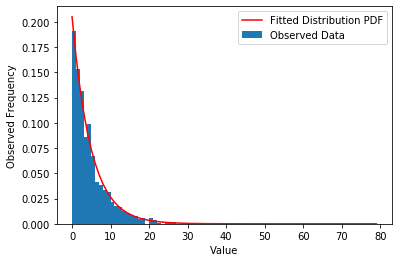

In [11]:
# Get the PDF, fill it with your calculated parameter, and plot it along x
x = range(0, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(scipy.stats.expon.pdf(x, scale=l), color = 'red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

3 : Fitting Data Using MLE

    Using the MLE estimators laid out in the lecture, fit the returns for SPY from 2014 to 2015 to a normal distribution.
    Check for normality using the Jarque-Bera test


In [0]:
prices = get_pricing('SPY', 
                     fields='price', 
                     start_date='2016-01-04', 
                     end_date='2016-01-05', 
                     frequency = 'minute')
returns = prices.pct_change()[1:]


In [0]:
mu = normal_mu(returns)
std = normal_sigma(returns)

x = np.linspace(returns.min(), returns.max(), num=1000)
h = plt.hist(returns, bins=50, normed='true')
l = plt.plot(x, scipy.stats.norm.pdf(x, loc=mu, scale=std), color = 'red')
plt.show(h, l);

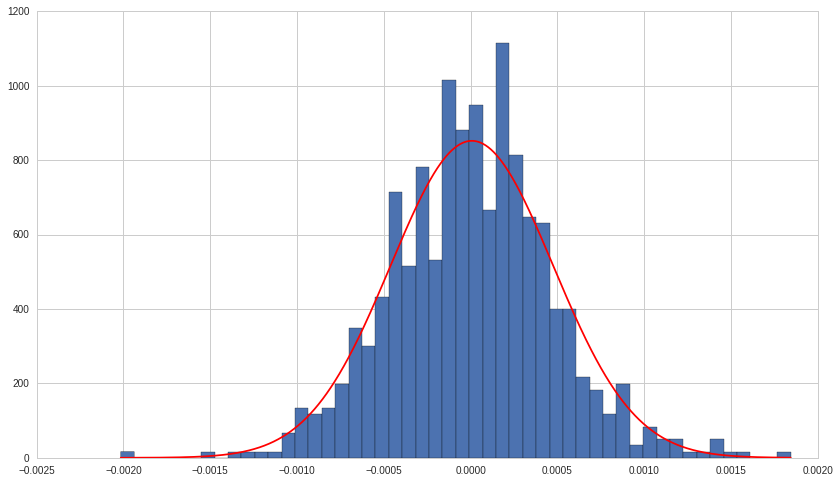

Recall that this fit only makes sense if we have normally distributed data.

In [0]:
alpha = 0.05
stat, pval = scipy.stats.mstats.normaltest(returns)
print (pval)

if pval > alpha: 
    print ('Accept our null hypothesis')
if pval < alpha: 
    print ('Reject our null hypothesis')



```
0.000572927470337
Reject our null hypothesis
```

